In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import Sequential, regularizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [61]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [62]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
print('train_df shape :',train_df.shape)
print('test_df shape :',test_df.shape)

train_df shape : (42000, 785)
test_df shape : (28000, 784)


In [65]:
#checking for null values for train
train_df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [66]:
#checking for null values for test
test_df.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [67]:
#checking for duplicates
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [68]:
train_df['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


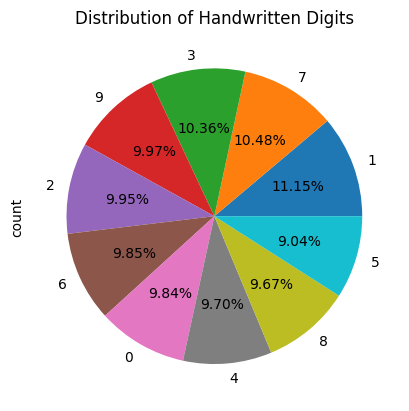

In [69]:
train_df['label'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Distribution of Handwritten Digits')
plt.show()

<ipython-input-70-af7969721a9d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=labels_df, x='label', palette='viridis')


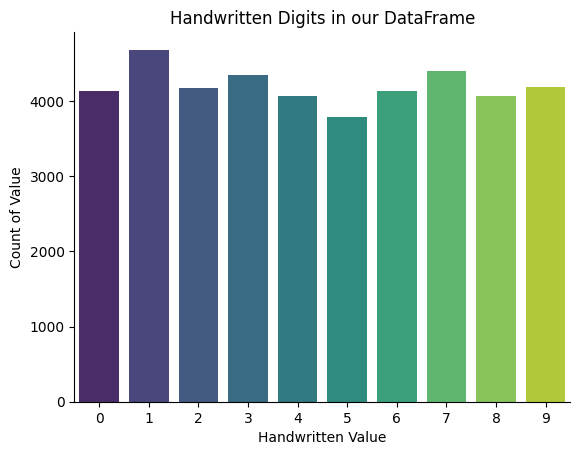

In [70]:

# Create a DataFrame for the labels
labels_df = pd.DataFrame(train_df, columns=['label'])

# Plot the distribution of digits
sns.countplot(data=labels_df, x='label', palette='viridis')
plt.xlabel("Handwritten Value")
plt.ylabel("Count of Value")
plt.title("Handwritten Digits in our DataFrame")
sns.despine()

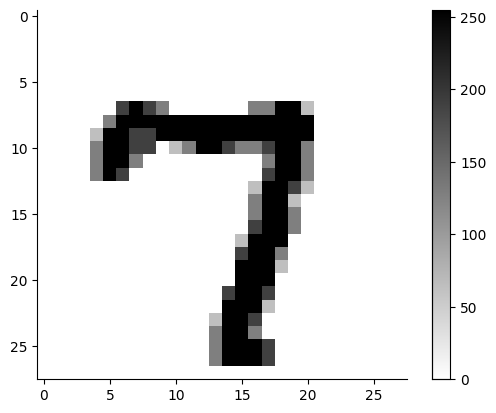

In [71]:
digit = train_df.iloc[29, 1:]
arr = np.array(digit)

image_arr = np.reshape(arr, (28,28))
dig_img = plt.imshow(image_arr, cmap=plt.cm.binary)
plt.colorbar(dig_img)
sns.despine()

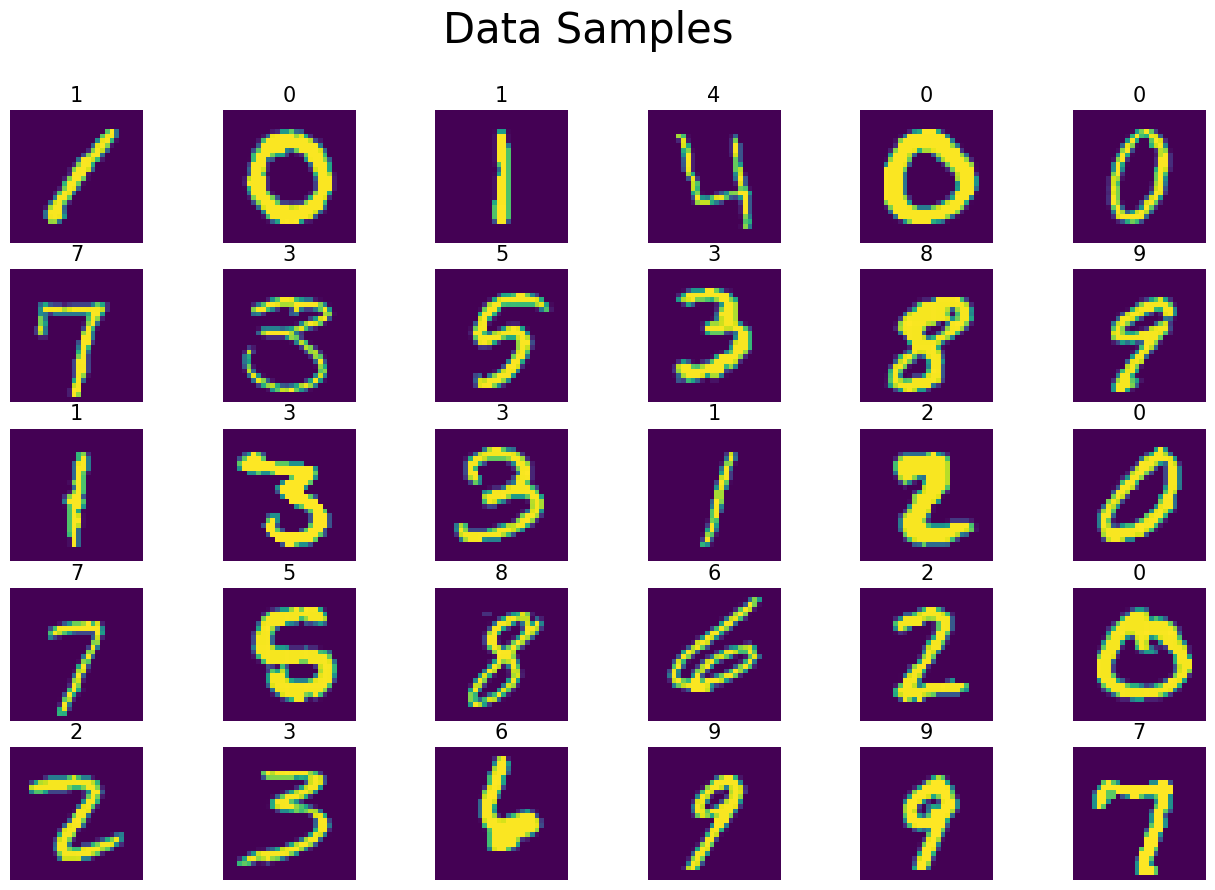

In [72]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(16,10))

i = 0
for row in range(5):
  for col in range(6):
    axs[row][col].imshow(train_df.iloc[i, 1:].values.reshape(28,28), cmap='viridis')
    axs[row][col].set_title(str(train_df.iloc[i, 0]), fontsize=15)
    axs[row][col].axis('off')
    i+=1

plt.suptitle('Data Samples', fontsize=30)
plt.show()

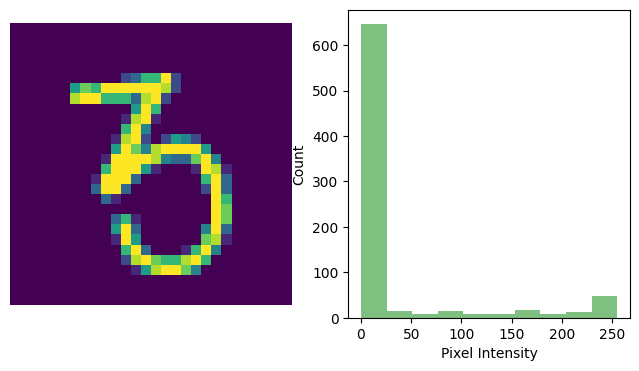

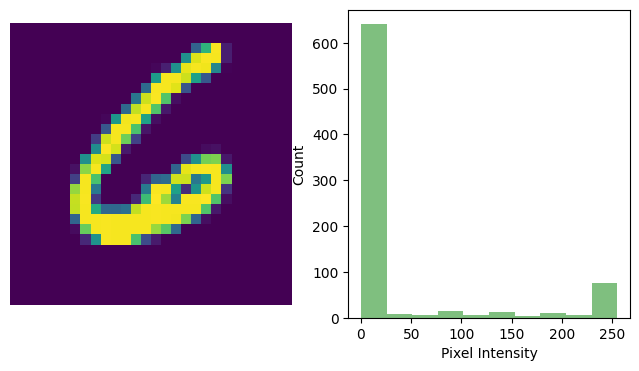

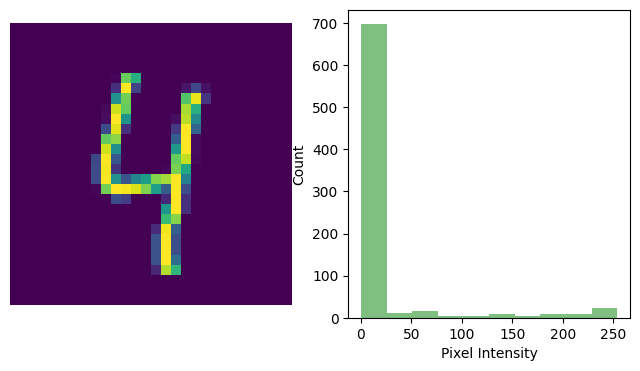

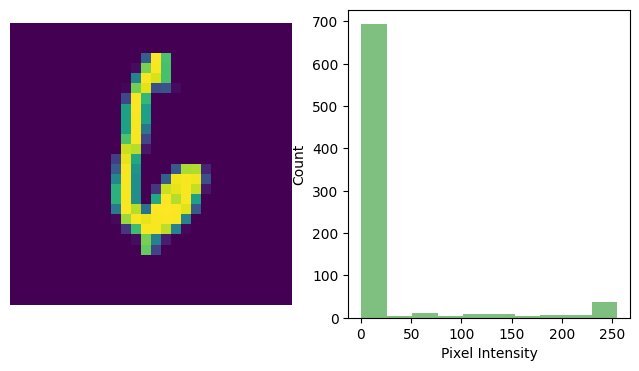

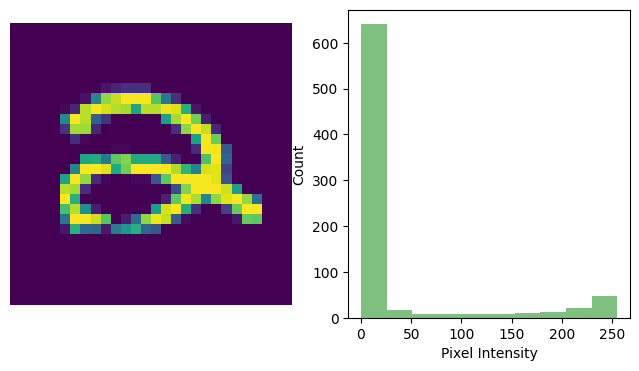

In [73]:
#displaying images and plotting pixel int
def plotHist(img):
  img = train_df.iloc[img, 1:].values.reshape(28,28)
  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap='viridis')
  plt.axis('off')
  histo = plt.subplot(1,2,2)
  histo.set_ylabel('Count')
  histo.set_xlabel('Pixel Intensity')
  plt.hist(img.flatten(), bins=10, lw=0, color='green', alpha=0.5)

for i in range(90,95):
  plotHist(i)

In [74]:
#splitting data into X and y
X = train_df.iloc[:,1:]
y = train_df['label']

In [77]:
#converting to numpy arrays
X = X.values
y = y.values

In [79]:
#normalizing the data
X = X/255.0
test_df = test_df/255.0

In [82]:
X = X.reshape(-1, 28, 28, 1)

In [84]:
#one hot encoding y
from keras.utils import to_categorical
y = y.ravel()
y = to_categorical(y, 10)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
#creating a CNN model with Tanh activation

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.02),padding='valid',activation='tanh',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.02),padding='valid',activation='tanh'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.02),padding='valid',activation='tanh'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


In [131]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [132]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,994 (257.79 KB)

 Trainable params: 65,674 (256.54 KB)

 Non-trainable params: 320 (1.25 KB)

In [133]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)

Epoch 1/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8510 - loss: 1.5216 - val_accuracy: 0.8224 - val_loss: 0.7779
Epoch 2/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9553 - loss: 0.3466 - val_accuracy: 0.8711 - val_loss: 0.6258
Epoch 3/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9588 - loss: 0.2996 - val_accuracy: 0.9613 - val_loss: 0.2787
Epoch 4/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9643 - loss: 0.2646 - val_accuracy: 0.9220 - val_loss: 0.4137
Epoch 5/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9669 - loss: 0.2436 - val_accuracy: 0.9513 - val_loss: 0.2893
Epoch 6/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9676 - loss: 0.2253 - val_accuracy: 0.9523 - val_loss: 0.2620
Epoch 7/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9703 - loss: 0.2046 - val_accuracy: 0.8711 - val_loss: 0.5316
Epoch 8/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9700 - loss: 0.1989 -

In [134]:
loss,accuracy = model.evaluate(X_train,y_train)
print(f"The model accuracy is : {accuracy} \nThe model loss : {loss}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9680 - loss: 0.1860
The model accuracy is : 0.9680356979370117 
The model loss : 0.18579603731632233


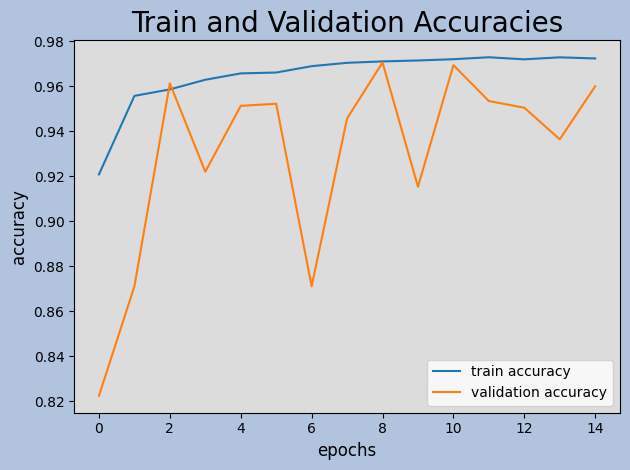

In [135]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

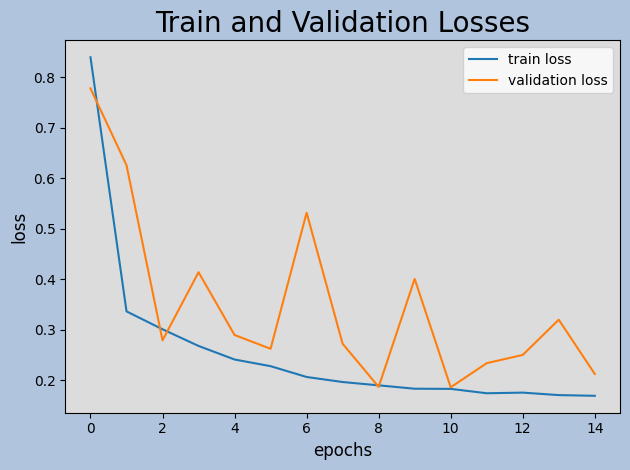

In [136]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [137]:
#creating a New CNN model with Relu as Activation

model2 = Sequential()

model2.add(Conv2D(32,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu',input_shape=(28,28,1)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Flatten())

model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation='softmax'))


In [138]:
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [139]:
model2.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,994 (257.79 KB)

 Trainable params: 65,674 (256.54 KB)

 Non-trainable params: 320 (1.25 KB)

In [140]:
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64,
    verbose=1
)

Epoch 1/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8536 - loss: 1.2710 - val_accuracy: 0.8120 - val_loss: 0.8567
Epoch 2/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9692 - loss: 0.2957 - val_accuracy: 0.9613 - val_loss: 0.2531
Epoch 3/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9734 - loss: 0.2103 - val_accuracy: 0.9687 - val_loss: 0.2029
Epoch 4/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9755 - loss: 0.1834 - val_accuracy: 0.9615 - val_loss: 0.2301
Epoch 5/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9778 - loss: 0.1700 - val_accuracy: 0.9621 - val_loss: 0.2159
Epoch 6/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9775 - loss: 0.1673 - val_accuracy: 0.9676 - val_loss: 0.2067
Epoch 7/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9780 - loss: 0.1589 - val_accuracy: 0.9805 - val_loss: 0.1561
Epoch 8/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9806 - loss: 0.1517 - val_accuracy: 0.

In [143]:
loss,accuracy = model2.evaluate(X_train,y_train)
print(f"The model accuracy is : {accuracy} \nThe model loss : {loss}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.1176
The model accuracy is : 0.9858928322792053 
The model loss : 0.11781243234872818


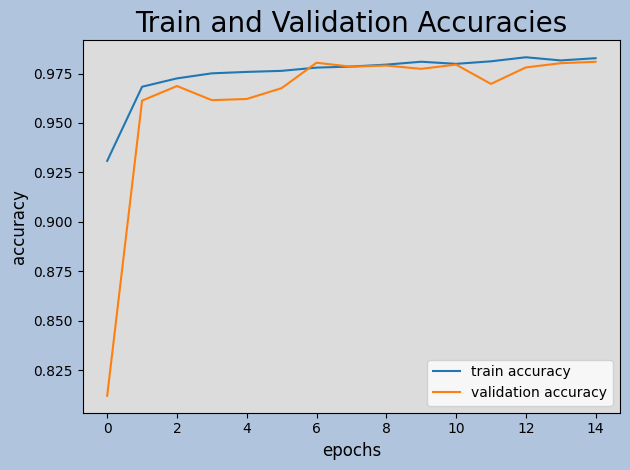

In [141]:
plt.plot(history2.history['accuracy'],label='train accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

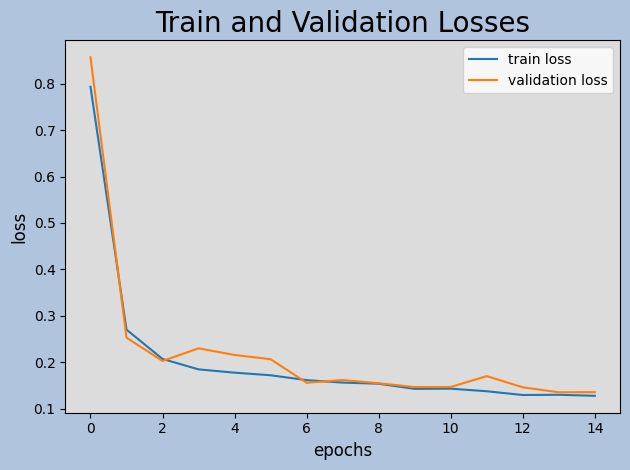

In [142]:
plt.plot(history2.history['loss'],label='train loss')
plt.plot(history2.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

Model 2 with Relu as Activation seems to be performing better.
So going forward with Model 2.

In [144]:
# Predict the class probabilities for the test dataset
predictions = model2.predict(X_val)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot to class indices

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [145]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot encoded to class indices
predicted_labels = np.argmax(predictions, axis=1)  # Already converting probabilities to class indices
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

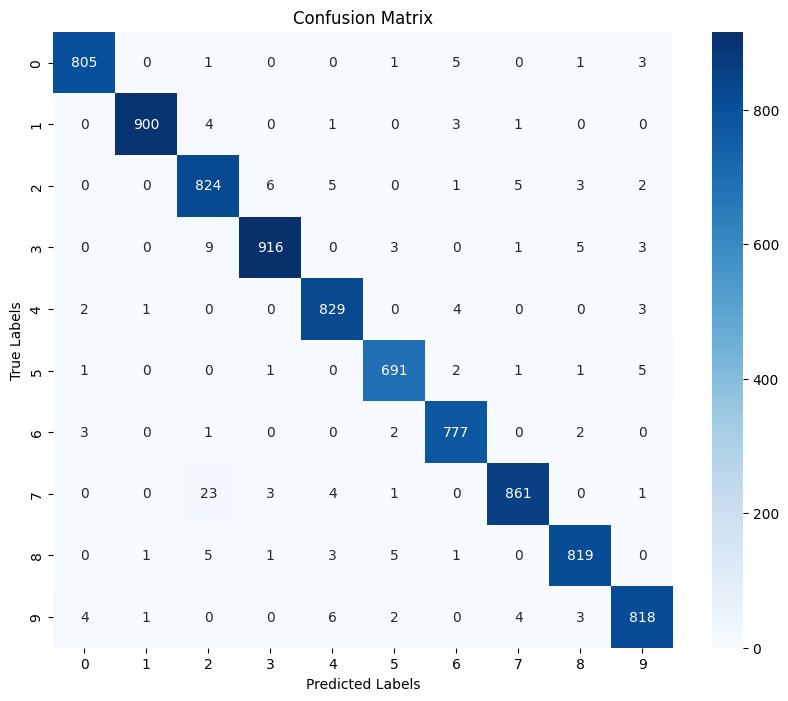

In [146]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [147]:
from sklearn.metrics import classification_report

report = classification_report(
    true_labels,
    predicted_labels,
    target_names=[str(i) for i in range(10)]
)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       1.00      0.99      0.99       909
           2       0.95      0.97      0.96       846
           3       0.99      0.98      0.98       937
           4       0.98      0.99      0.98       839
           5       0.98      0.98      0.98       702
           6       0.98      0.99      0.98       785
           7       0.99      0.96      0.98       893
           8       0.98      0.98      0.98       835
           9       0.98      0.98      0.98       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [162]:
# Save the model
model2.save("MNIST_Classification.keras")

In [187]:
# Save weights
model2.save_weights('model.weights.h5')


In [173]:
# Convert Test data to NumPy array
test_X = test_df.to_numpy()

# Reshape X to 4D for CNN
test_X = test_X.reshape(-1, 28, 28, 1)  # reshaping 28x28 grayscale images

In [174]:
test_X.shape

(28000, 28, 28, 1)

In [179]:
#normalizing test data
#test_X = test_X/255.0

In [175]:
from tensorflow.keras.models import load_model

model = load_model("MNIST_Classification.h5")  # Load the model you saved earlier


In [176]:
# Predict the labels for the test data
predictions = model.predict(test_X)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [177]:
predicted_labels = np.argmax(predictions, axis=1)

In [178]:
print(predicted_labels)


[2 0 9 ... 3 9 2]


In [180]:
predicted_labels.shape


(28000,)

In [181]:
submission =  pd.DataFrame({
        "ImageId": test_df.index+1,
        "Label":predicted_labels
    })

In [182]:
submission['Label'].value_counts()


,count
Label,
1,3158
2,2871
7,2824
4,2806
6,2786
9,2772
0,2759
3,2751
8,2744


In [183]:
submission.to_csv('MNIST_submission.csv', index=False)